## This note book:

### Calculate chi and plot the chi time series of the top N days delected from acsm1

In [5]:
# read in libraries
import sys, os
import netCDF4
import scipy.io, numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.patches as mpatches

In [6]:
file = '/Users/evenhou/Downloads/HOU_data/houaoshtdmaM1.b1.20211012.000544.nc'
ds = netCDF4.Dataset(file)
for var in ds.variables.keys():
    print(var)

base_time
time_offset
time
time_bounds
bin_center
bin_bounds
dry_diameter_setting
qc_dry_diameter_setting
dry_pressure
qc_dry_pressure
dry_temperature
qc_dry_temperature
dry_rh
qc_dry_rh
scan_min_diameter_setting
scan_max_diameter_setting
scan_time_setting
num_bins
humid_sample_flow_avg
qc_humid_sample_flow_avg
humid_sample_flow_std
humid_sheath_flow_avg
qc_humid_sheath_flow_avg
humid_sheath_flow_std
excess_flow_avg
qc_excess_flow_avg
excess_flow_std
sample_bypass_flow_avg
qc_sample_bypass_flow_avg
sample_bypass_flow_std
upstream_sample_flow_avg
qc_upstream_sample_flow_avg
upstream_sample_flow_std
upstream_sheath_flow_avg
qc_upstream_sheath_flow_avg
upstream_sheath_flow_std
upstream_excess_flow_avg
qc_upstream_excess_flow_avg
upstream_excess_flow_std
dma_rh_avg
qc_dma_rh_avg
dma_rh_std
hd_rh_avg
qc_hd_rh_avg
hd_rh_std
pressure_avg
qc_pressure_avg
pressure_std
temperature_avg
qc_temperature_avg
temperature_std
cpc_a_flow_avg
qc_cpc_a_flow_avg
cpc_a_flow_std
cpc_b_flow_avg
qc_cpc_b_flow_

In [13]:
top_dates_d = [20211031.,20220923., 20211007., 20220206., 20220117., 20220302., 20220910.,
 20220911., 20211008., 20220912., 20211005., 20220904., 20220924., 20220902.,
 20211004., 20211006., 20220915., 20211213., 20220104., 20220909., 20220913.,
 20220903., 20211102., 20211101., 20220320., 20211106., 20211022., 20220826.,
 20211009., 20220914., 20211222., 20220113., 20220929., 20211112., 20211120.,
 20211103., 20211114., 20220908., 20220921., 20221001., 20211108., 20211017.,
 20220114., 20220713., 20211109.]

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:143: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


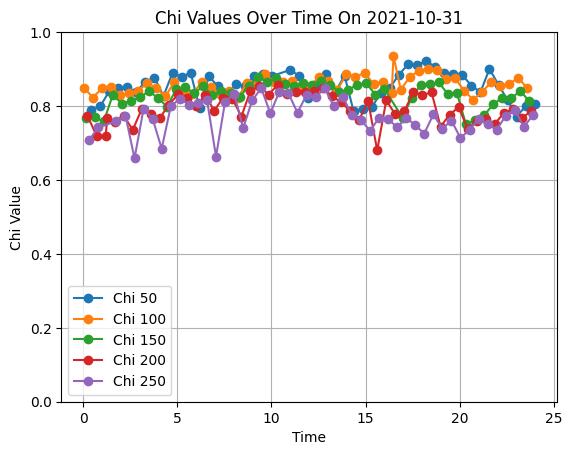

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


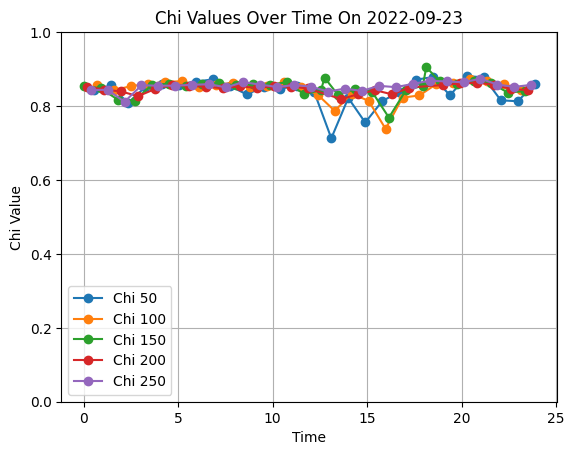

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

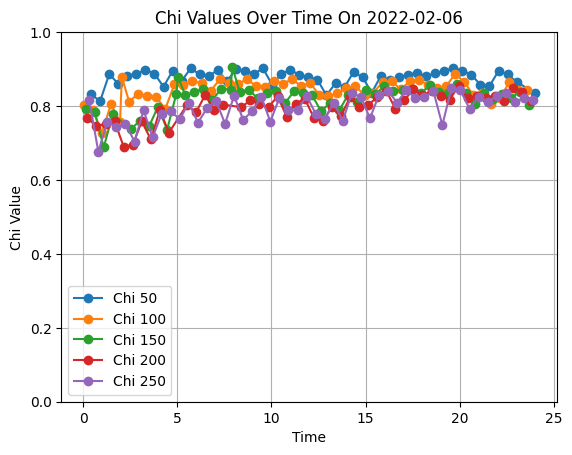

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


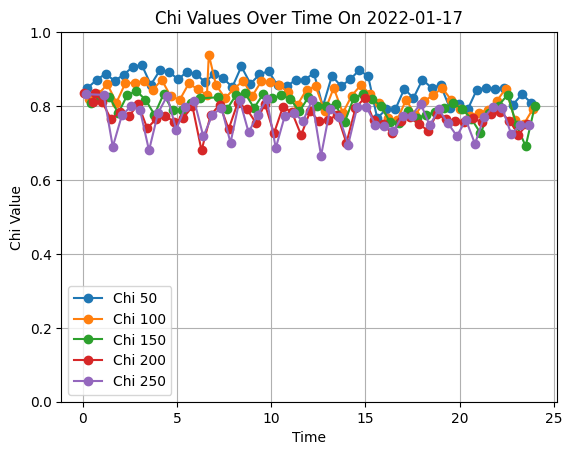

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


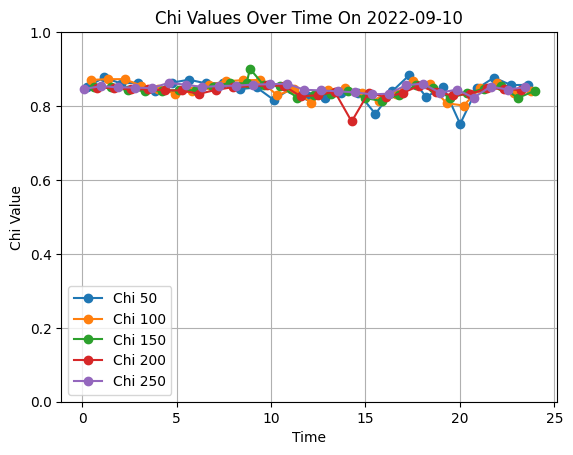

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

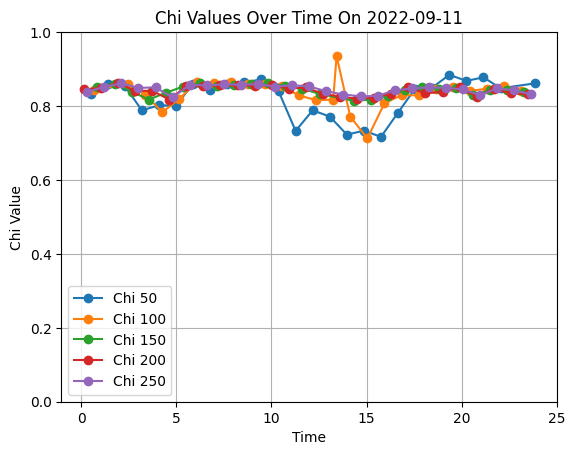

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


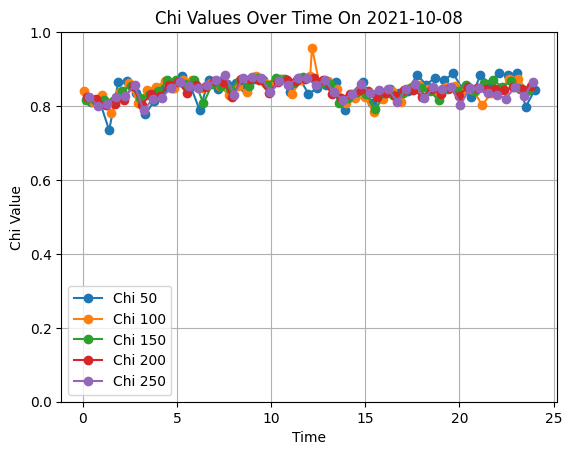

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

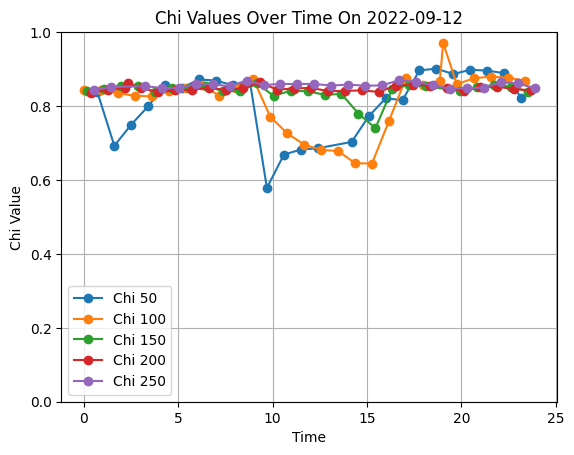

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

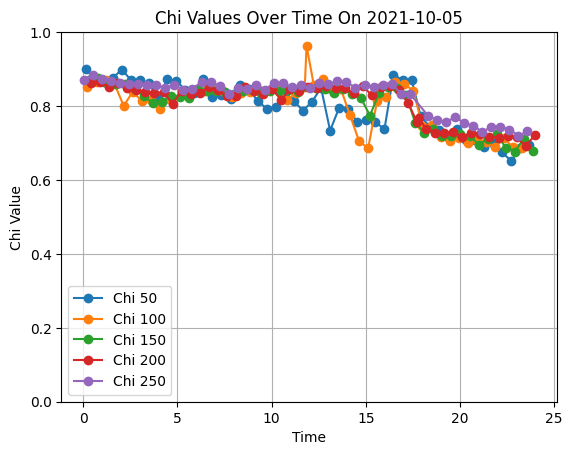

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


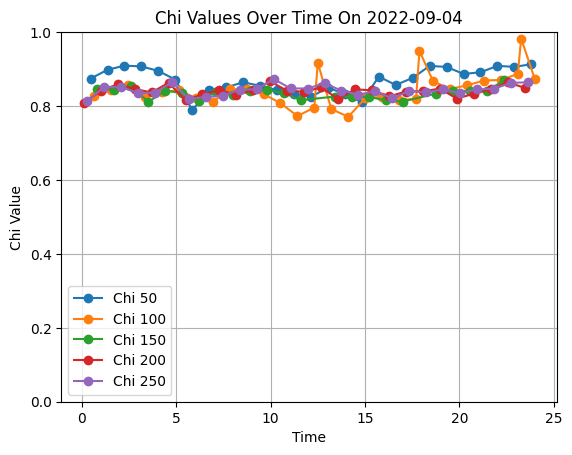

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

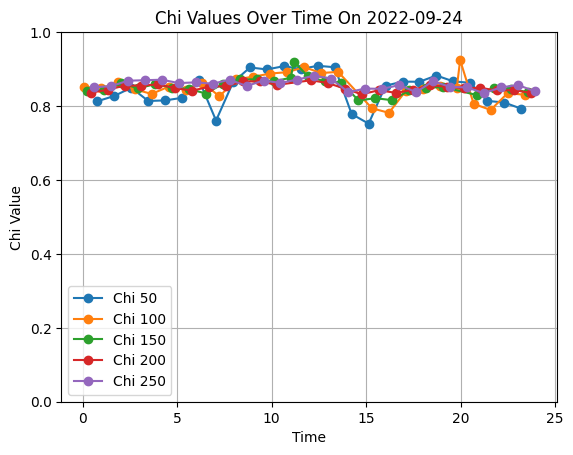

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


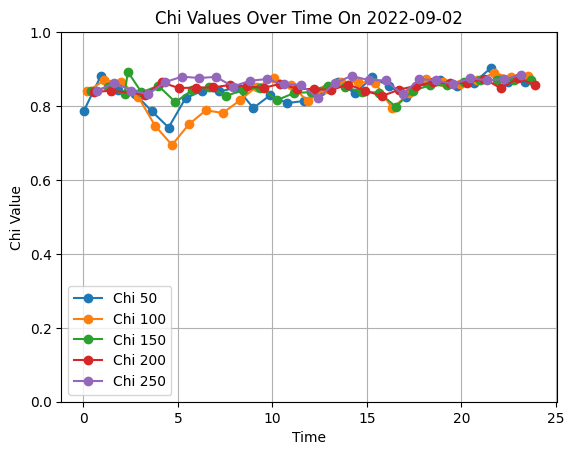

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

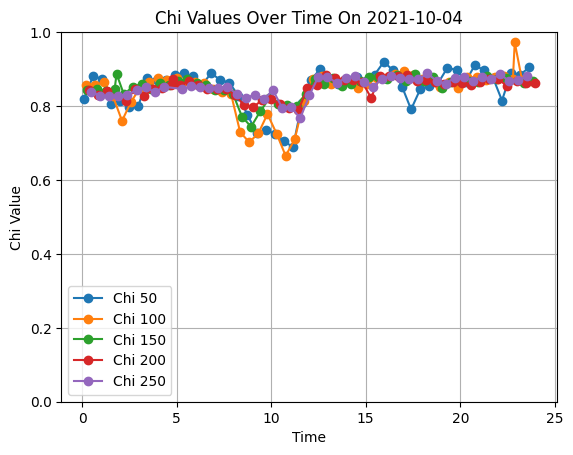

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

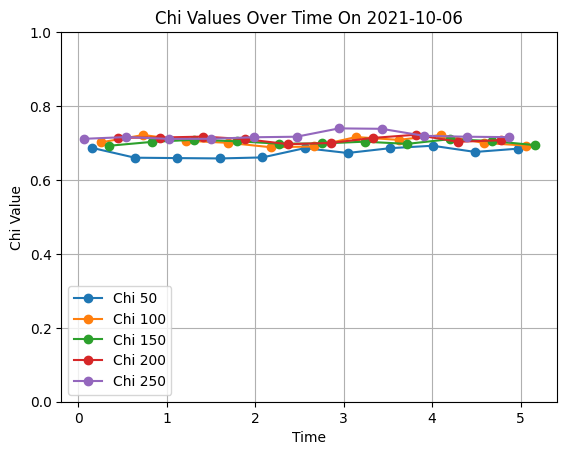

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

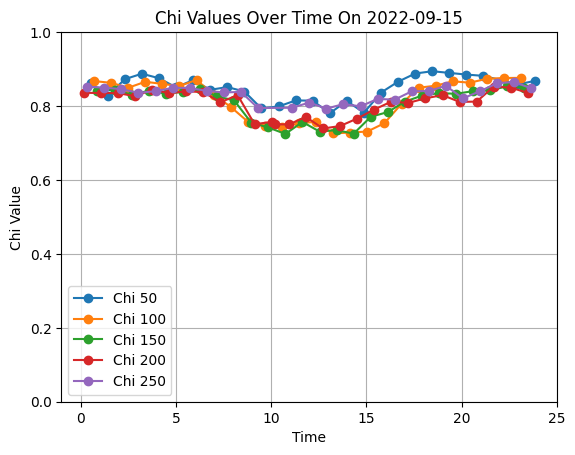

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

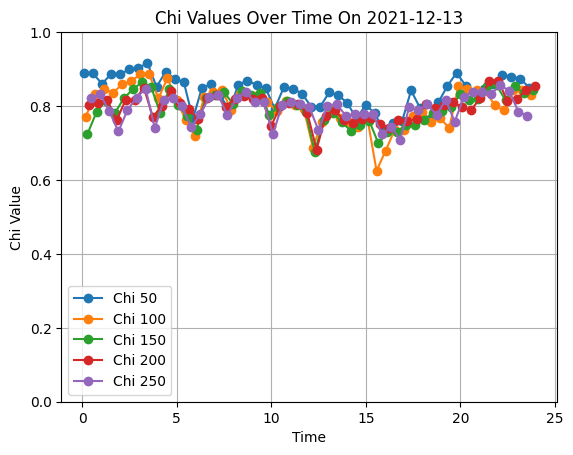

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

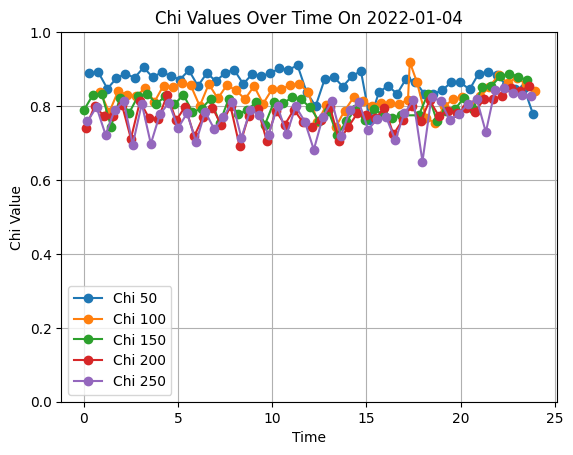

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


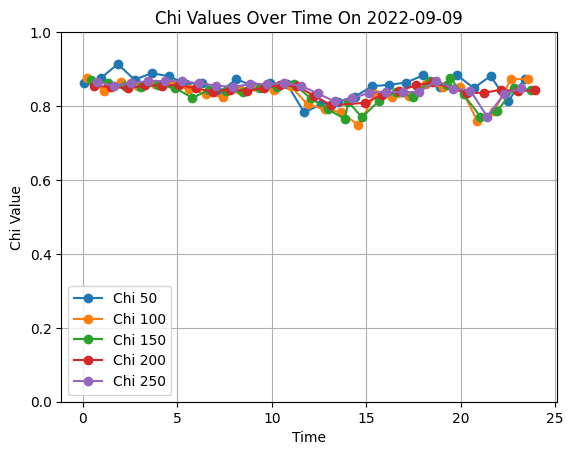

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

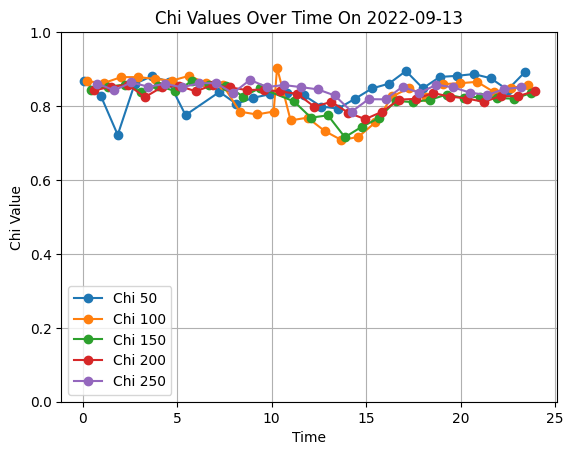

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


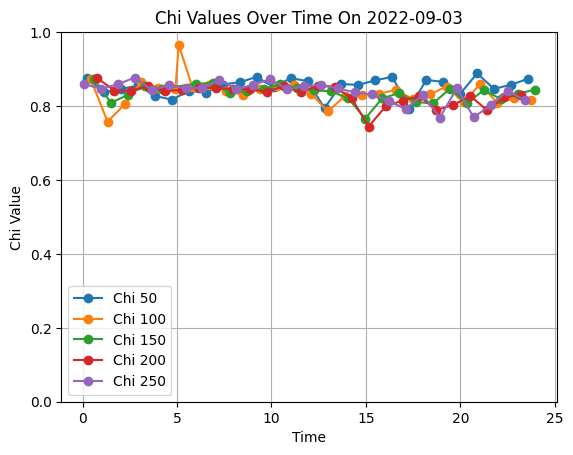

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:143: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


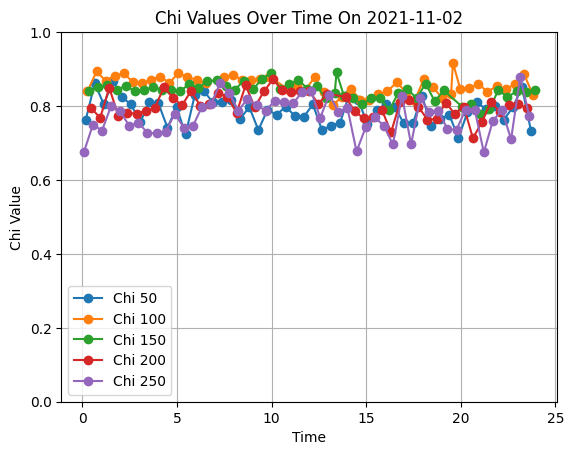

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

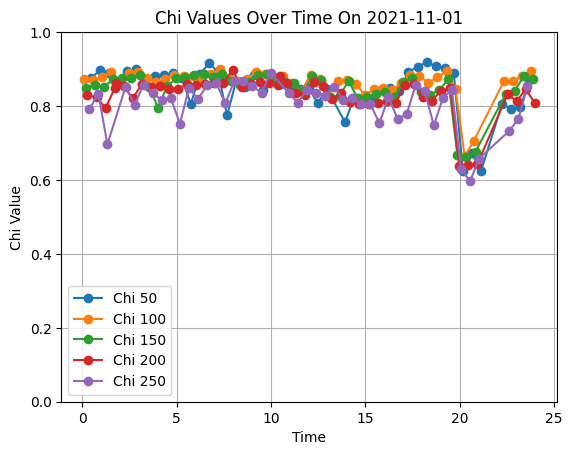

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

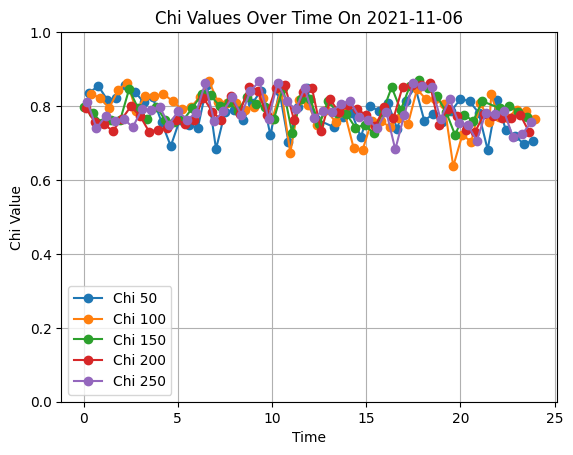

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


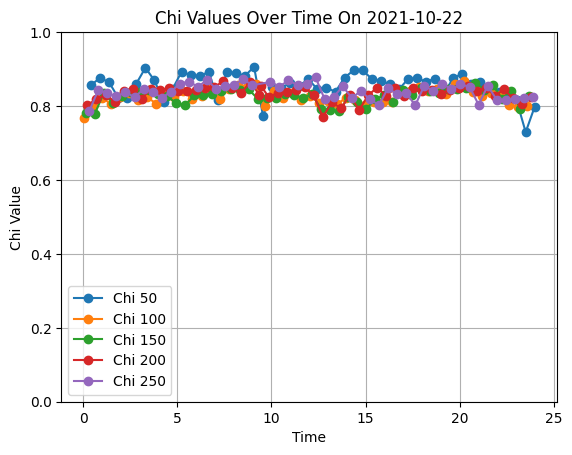

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


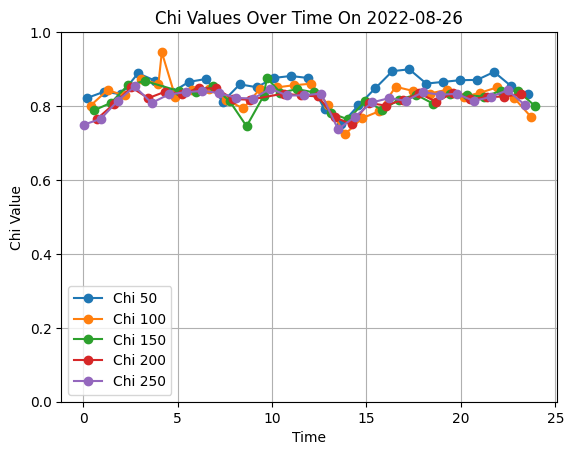

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


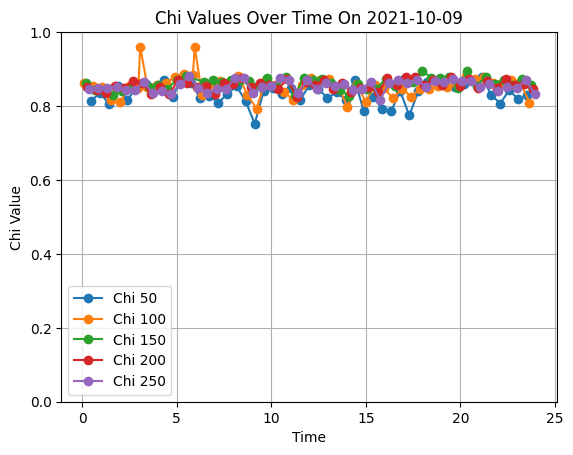

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


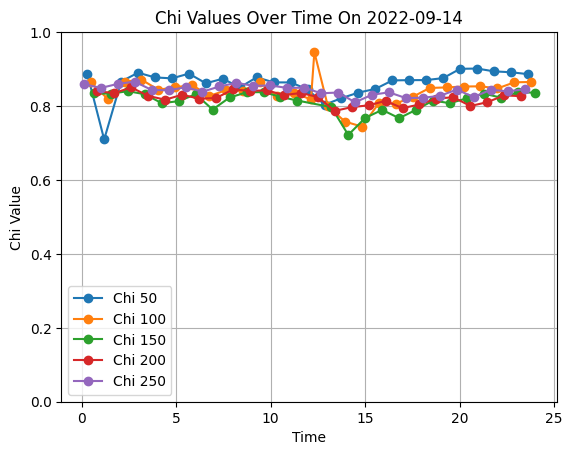

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:143: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


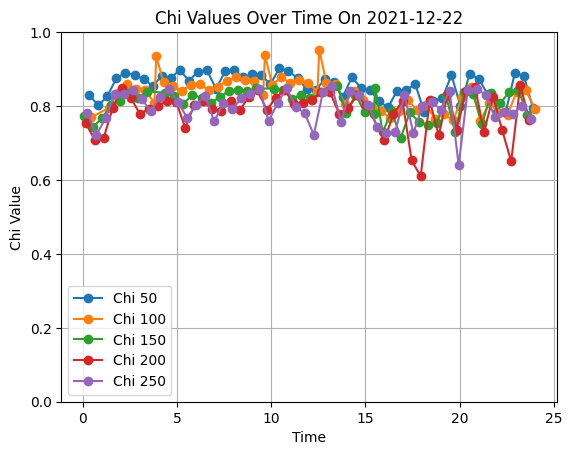

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

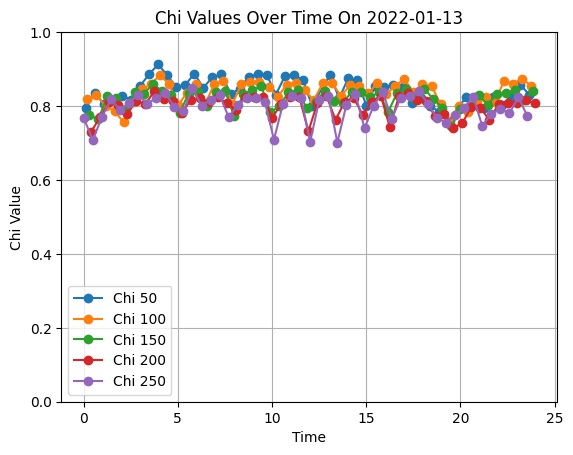

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


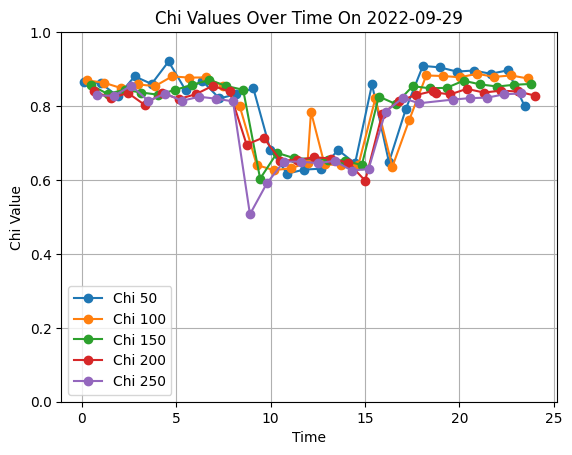

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

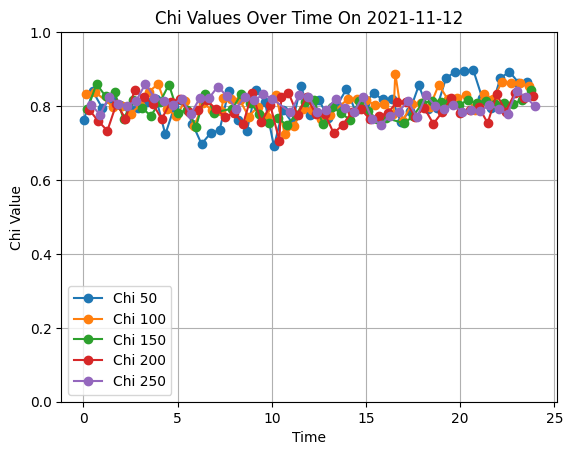

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


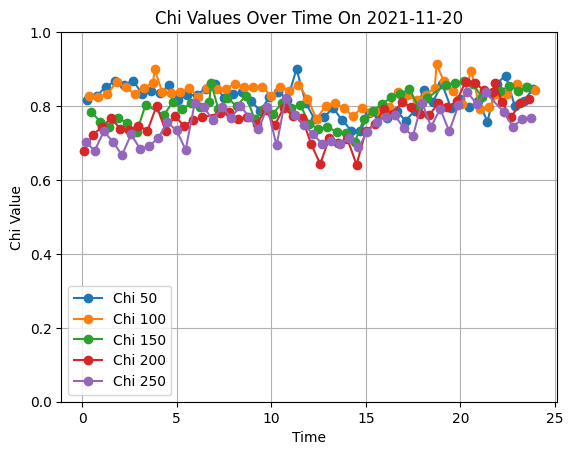

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

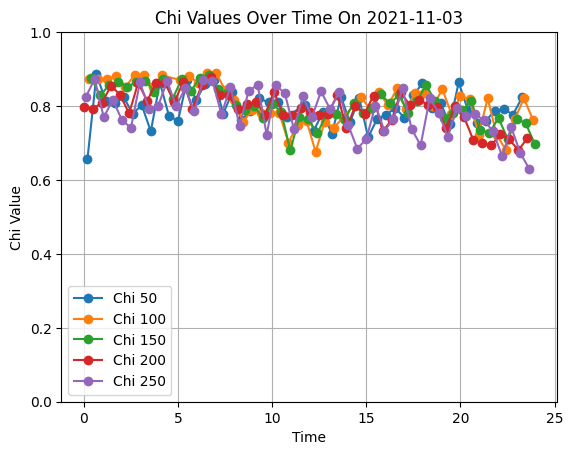

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

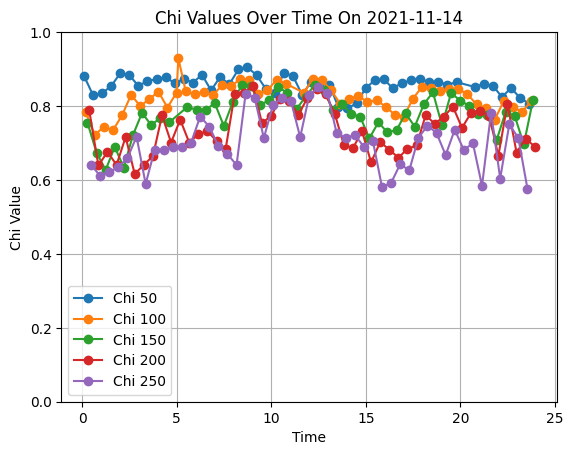

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


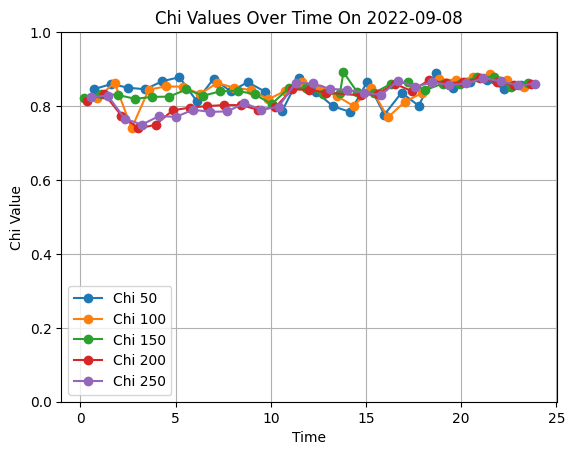

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


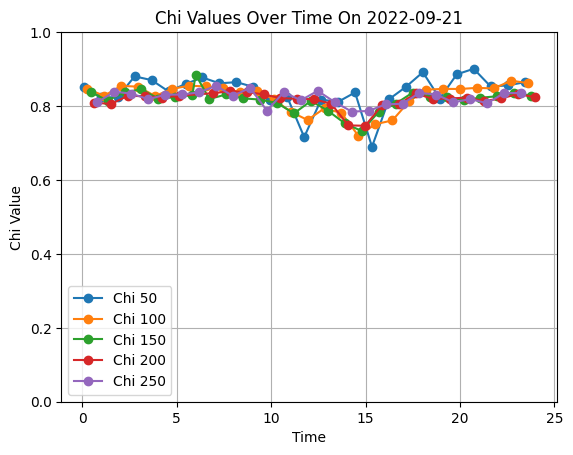

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:143: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


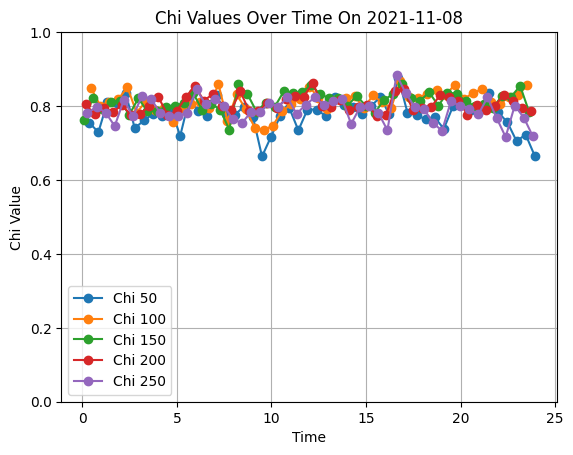

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:143: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


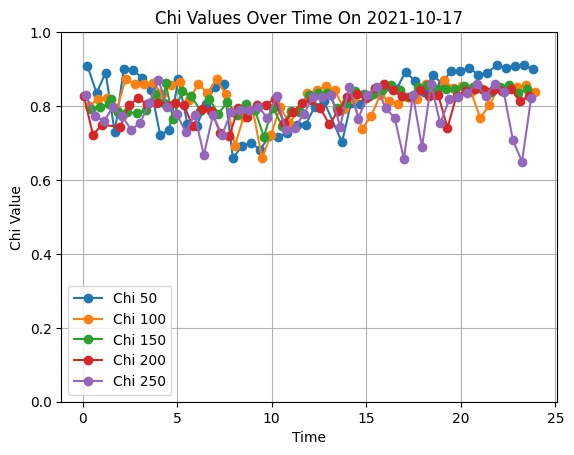

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:143: RuntimeWarning: invalid value encountered in divide
  chi = (D_alpha-1)/(D_gamma-1)


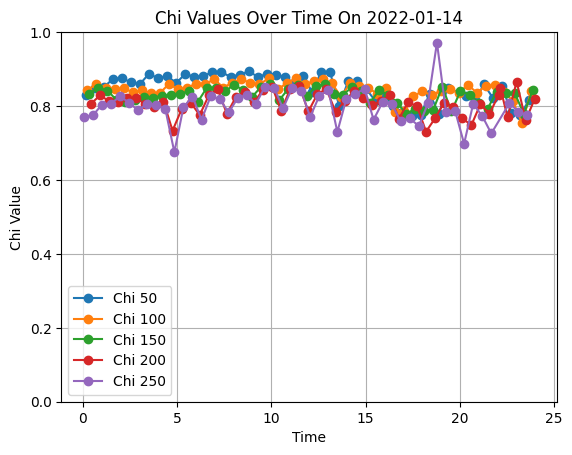

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

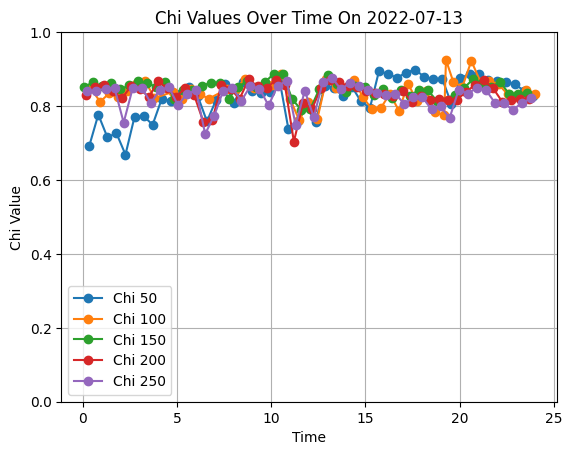

/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: divide by zero encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:81: RuntimeWarning: invalid value encountered in divide
  conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: divide by zero encountered in log
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd3g97l3ky6q4w0000gn/T/ipykernel_5170/1691800222.py:136: RuntimeWarning: invalid value encountered in multiply
  H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
/var/folders/n8/bjc7cpvs3hnd

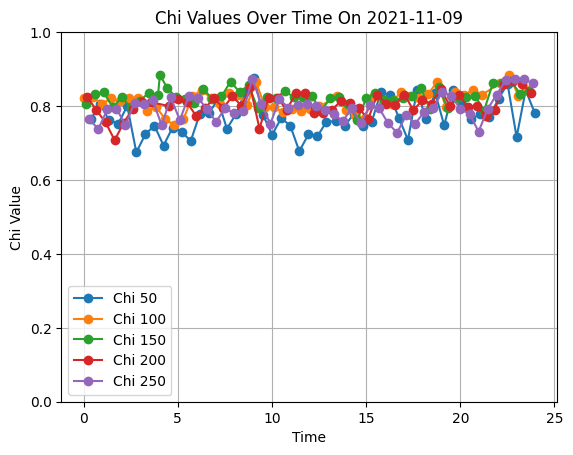

In [14]:
directory = '/Users/evenhou/Downloads/HOU_data'

for date in top_dates_d:    
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filename = subdir + os.sep + file
            if 'houaoshtdmaM1.b1.'+ str(date) in filename and ('.nc' in filename):
# =============== FOR EACH FILE ===============
# get dimensions of time and bins
                kappa_LH = 0.01
                kappa_MH = 0.65

                chi50 = np.array([]) 
                chi100 = np.array([])
                chi150 = np.array([])
                chi200 = np.array([])
                chi250 = np.array([])
                ds = netCDF4.Dataset(filename)
                s1 = str(ds.dimensions['time'])
                s2 = str(ds.dimensions['bin'])
                # print(s)
                x = -3
                if (s1[x-1:x+1] != '='):
                    dim_time = int(s1[x:])
                else:
                    dim_time = int(s1[x-1:])
                if (s2[x-1:x+1] != '='):
                    dim_bin = int(s2[x:])
                else:
                    dim_bin = int(s2[x-1:])
                # print(dim_time, dim_bin)
                # print(filename)

    # CHANGE HERE: define arrays
                time = np.zeros(dim_time)
                dry_dia = np.zeros(dim_time)
                kappa = np.zeros((dim_time, dim_bin))
                k_bound = np.zeros((dim_time, dim_bin,2))
                conc = np.zeros((dim_time, dim_bin))
                # date = np.zeros(dim_time)
                
    # CHANGE HERE: read data into arrays
                ncf = scipy.io.netcdf_file(filename, mmap=False)
                date = int(filename[-18:-10]) # read i.e. 20210427
            
                time[:] = ncf.variables["time"].data/3600 # hr
                dry_dia[:] = ncf.variables["dry_diameter_setting"].data # nm
                for i_time in range(dim_time):
                    kappa[i_time, :] = ncf.variables['kappa'][i_time, :]
                    k_bound[i_time, :, :] = ncf.variables['kappa_bounds'][i_time, :, :]
                    conc[i_time,:] = ncf.variables['aerosol_concentration'][i_time, :] # dN, unit: 1/cm^3
                # print(dry_dia)
                # print(k_bound)

    # calculations
                dK = np.zeros((dim_time,dim_bin))
                for i_time in range(dim_time):
                    dK[i_time, :] = k_bound[i_time, :, 1] -  k_bound[i_time, :, 0]
                conc_norm0 = np.zeros((dim_time,dim_bin)) # dN/dK
                for i_time in range(dim_time):
                    conc_norm0[i_time, :] = conc[i_time, :]/dK[i_time, :]
                
                # Create a mask for valid kappa values
                valid_kappa_mask = (kappa >= kappa_LH) & (kappa <= kappa_MH)
                date_str = f"{date:8}"  # Convert to string for formatting
                formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
                # Update conc matrix for invalid kappa values
                conc[~valid_kappa_mask] = 0
                N_tot = conc.sum(axis=1)
                # Check if there is 0 value in N_tot
                has_zero = np.any(N_tot == 0)
                #print(has_zero)
                # Find indices of zero values
                zero_indices = np.where(N_tot == 0)
                #print(zero_indices)
                # use pandas to manipulate data
                d = {'dry_dia': dry_dia, 'time':time, 'date':date, 'N_tot':N_tot}
                df = pd.DataFrame(data = d)
                conc_norm = np.zeros((dim_time,dim_bin))
                for i_time in range(dim_time):
                    conc_norm[i_time, :] = conc_norm0[i_time, :]/N_tot[i_time]
                
                newdf = pd.DataFrame(np.repeat(df.values, dim_bin, axis=0),
                                        columns=df.columns)
                # print(dim_bin)
                #print(newdf.shape)
                newdf['kappa'] = kappa.ravel() # K_i
                newdf['conc'] = conc.ravel()
                newdf['dK'] = dK.ravel()
                newdf['conc_norm0'] = conc_norm0.ravel()  # dN/dK
                rows_with_nan = np.where(np.isnan(conc_norm).any(axis=1))[0]
                #print("rows_with_nan",rows_with_nan)

                dNdK0 = np.array([])
                # Remove corresponding rows from both conc_norm, kappa, and dry_dia
                conc_norm_clean = np.delete(conc_norm, rows_with_nan, axis=0)
                kappa_clean = np.delete(kappa, rows_with_nan, axis=0)
                dry_dia_clean = np.delete(dry_dia, rows_with_nan, axis=0)
                time_clean = np.delete(time, rows_with_nan, axis=0)
                dNdK0 = np.append(dNdK0,conc_norm_clean)

                newdf['conc_norm'] = newdf['conc_norm0']/newdf['N_tot'] # dN°/dK = c(k)_i
                newdf['p_MH_i'] = (newdf.kappa-kappa_LH)/(kappa_MH-kappa_LH)
                newdf['p_LH_i'] = 1 - newdf['p_MH_i']

                newdf.loc[newdf['N_tot'] == 0, 'p_MH_i'] = 0
                newdf.loc[newdf['kappa'] < kappa_LH, 'p_MH_i'] = 0
                newdf.loc[newdf['kappa'] > kappa_MH, 'p_MH_i'] = 0

                newdf.loc[newdf['N_tot'] == 0, 'p_LH_i'] = 0
                newdf.loc[newdf['kappa'] < kappa_LH, 'p_LH_i'] = 0
                newdf.loc[newdf['kappa'] > kappa_MH, 'p_LH_i'] = 0

                newdf['H_i'] = -newdf.p_LH_i*np.log(newdf.p_LH_i)-newdf.p_MH_i*np.log(newdf.p_MH_i)
                newdf['H_alpha_i'] = newdf.H_i*newdf.conc_norm*newdf.dK
                newdf['p_mh_i'] = newdf.p_MH_i*newdf.conc_norm*newdf.dK
                newdf['p_lh_i'] = newdf.p_LH_i*newdf.conc_norm*newdf.dK

                newdf.loc[newdf['N_tot'] == 0, 'H_alpha_i'] = 0
                newdf.loc[newdf['kappa'] < kappa_LH, 'H_alpha_i'] = 0
                newdf.loc[newdf['kappa'] > kappa_MH, 'H_alpha_i'] = 0

                H_alpha = np.array([])
                p_MH = np.array([])
                p_LH = np.array([])
                for i in range(0,int(len(newdf)/60)):
                    h_alpha = (newdf.iloc[i*60:i*60+59].sum()).H_alpha_i
                    H_alpha = np.append(H_alpha,h_alpha)
                    p_mh = (newdf.iloc[i*60:i*60+59].sum()).p_mh_i
                    p_lh = (newdf.iloc[i*60:i*60+59].sum()).p_lh_i
                    p_MH = np.append(p_MH,p_mh)
                    p_LH = np.append(p_LH,p_lh)

                D_alpha = np.exp(H_alpha)
                # print(D_alpha)
                H_gamma = -p_LH*np.log(p_LH)-p_MH*np.log(p_MH)
                # print("H_gamma",H_gamma)

                H_gamma = np.nan_to_num(H_gamma)
                # print("H_gamma",H_gamma)

                D_gamma = np.exp(H_gamma)
                chi = (D_alpha-1)/(D_gamma-1)
                            # print("chi",chi)
                            # print(len(chi))

                df['p_MH'] = p_MH.tolist()
                df['p_LH'] = p_LH.tolist()
                df['D_alpha'] = D_alpha.tolist()
                df['D_gamma'] = D_gamma.tolist()
                df['chi'] = chi.tolist()
                # plt.scatter(time,p_LH)
                # print(df)

                df_valid = df[df['N_tot'] != 0]
                # print(df_valid.chi)
                df_valid = df.dropna(subset=["chi"])
                # print(df_valid.chi)
                # print(df_valid)
                chi_final = df_valid["chi"].to_numpy()

                df50 = df_valid[df_valid["dry_dia"] == 50]
                df100 = df_valid[df_valid["dry_dia"] == 100]
                df150 = df_valid[df_valid["dry_dia"] == 150]
                df200 = df_valid[df_valid["dry_dia"] == 200]
                df250 = df_valid[df_valid["dry_dia"] == 250]

                time50_i = df50["time"].to_numpy()
                chi50_i = df50["chi"].to_numpy()
                chi50 = np.append(chi50,chi50_i)
                # print("chi50",chi50)
                # print(len(chi50))
                # print("len of chi50",len(chi50))

                chi100_i = df100["chi"].to_numpy()
                chi100 = np.append(chi100,chi100_i)
                # print("chi100",chi100)8210
                # print("len of chi100",len(chi100))
                chi150_i = df150["chi"].to_numpy()
                chi150 = np.append(chi150,chi150_i)

                chi200_i = df200["chi"].to_numpy()
                chi200 = np.append(chi200,chi200_i)

                chi250_i = df250["chi"].to_numpy()
                chi250 = np.append(chi250,chi250_i)

                plt.plot(df50.time, chi50, label='Chi 50', marker='o')
                plt.plot(df100.time, chi100, label='Chi 100', marker='o')
                plt.plot(df150.time, chi150, label='Chi 150', marker='o')
                plt.plot(df200.time, chi200, label='Chi 200', marker='o')
                plt.plot(df250.time, chi250, label='Chi 250', marker='o')
                date_str = f"{date:8}"  # Convert to string for formatting
                formatted_date = f"{date_str[0:4]}-{date_str[4:6]}-{date_str[6:8]}"  # YYYY-MM-DD
                plt.title(f'Chi Values Over Time On {formatted_date}')
                plt.xlabel('Time')
                plt.ylabel('Chi Value')
                plt.ylim(0, 1)
                plt.legend()
                plt.grid(True)
                # plt.savefig(f'/Users/evenhou/Downloads/{formatted_date}.png')
                plt.show()
        
                            
